In [1]:
# IMPORTS

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# Define Constants
POOP_DF_COLUMN_DATE='date'
POOP_DF_COLUMN_DATETIME='datetime'
POOP_DF_COLUMN_HOUR='heure'
POOP_DF_COLUMN_DATETIME_OF_DAY='datetime_ofday'
POOP_DF_COLUMN_NATURE='nature'
POOP_DF_VALUE_NATURE_POOP='caca'
POOP_DF_COLUMN_LOCATION='lieu'
POOP_DF_VALUE_LOCATION_IN='in'

In [3]:
# Loading poop data
# data consolidation: Computing poop date and hour of day as datetime
df_poop=pd.read_csv('../data/poop.csv',sep=';')
df_poop[POOP_DF_COLUMN_DATETIME]=df_poop[[POOP_DF_COLUMN_DATE, POOP_DF_COLUMN_HOUR]].apply(lambda x : datetime.strptime('{}T{}'.format(x.iloc[0],x.iloc[1]), "%Y-%m-%dT%H:%M"), axis=1)
_today=datetime.now().strftime("%Y-%m-%d")
df_poop[POOP_DF_COLUMN_DATETIME_OF_DAY]=df_poop[[POOP_DF_COLUMN_HOUR]].apply(lambda x : datetime.strptime('{}T{}'.format(_today,x.iloc[0]), "%Y-%m-%dT%H:%M"), axis=1)

Pct of pee poop not in the hous during the day


<BarContainer object of 8 artists>

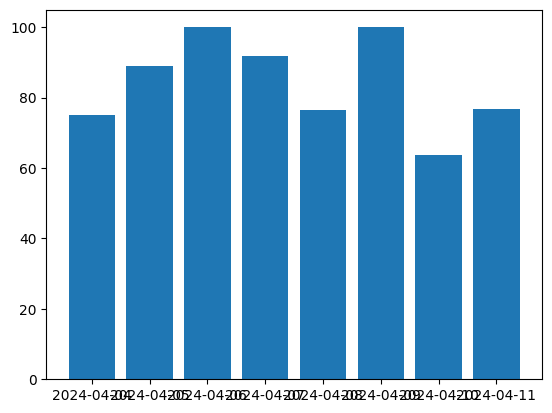

In [4]:
# filtering during the day data
_start_of_day=datetime.now().replace(hour=6, minute=30, second=0)
_end_of_day=datetime.now().replace(hour=21, minute=0, second=0)

df_poop_day=df_poop[df_poop.apply(lambda x: (x[POOP_DF_COLUMN_DATETIME_OF_DAY] > _start_of_day) & (x[POOP_DF_COLUMN_DATETIME_OF_DAY] < _end_of_day), axis=1)]
df_poop_day_efficiency=df_poop_day.groupby(POOP_DF_COLUMN_DATE).size().to_frame('total').reset_index()
df_poop_day_efficiency['success']=df_poop_day.loc[df_poop_day[POOP_DF_COLUMN_LOCATION] != POOP_DF_VALUE_LOCATION_IN].groupby(POOP_DF_COLUMN_DATE).size().to_frame('total').reset_index()['total']
df_poop_day_efficiency['success_rate']=round(df_poop_day_efficiency['success'] * 100 / df_poop_day_efficiency['total'], 1)

print('Pct of pee poop not in the hous during the day')
plt.bar(df_poop_day_efficiency[POOP_DF_COLUMN_DATE], df_poop_day_efficiency['success_rate'])


Pct of pee poop not in the hous during the night


<BarContainer object of 0 artists>

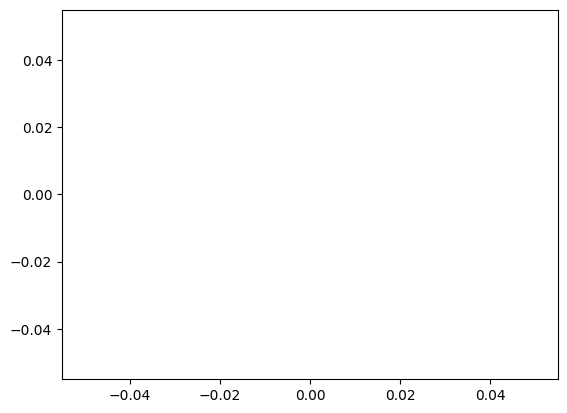

In [5]:
# filtering during the night data

df_poop_night=df_poop[df_poop.apply(lambda x: (x[POOP_DF_COLUMN_DATETIME_OF_DAY] <= _start_of_day) & (x[POOP_DF_COLUMN_DATETIME_OF_DAY] >= _end_of_day), axis=1)]
df_poop_night_efficiency=df_poop_night.groupby(POOP_DF_COLUMN_DATE).size().to_frame('total').reset_index()
df_poop_night_efficiency['success']=df_poop_night.loc[df_poop_night[POOP_DF_COLUMN_LOCATION] != POOP_DF_VALUE_LOCATION_IN].groupby(POOP_DF_COLUMN_DATE).size().to_frame('total').reset_index()['total']
df_poop_night_efficiency['success_rate']=round(df_poop_night_efficiency['success'] * 100 / df_poop_night_efficiency['total'], 1)

print('Pct of pee poop not in the hous during the night')
plt.bar(df_poop_night_efficiency[POOP_DF_COLUMN_DATE], df_poop_night_efficiency['success_rate'])
